In [1]:
import os
import pandas as pd
import numpy as np

from math import ceil 
from skimage import io
from skimage import filters, color
from scipy import ndimage as ndi
from PIL import Image
import cv2
import matplotlib
matplotlib.rcParams.update({'figure.max_open_warning': 0})
import matplotlib.pyplot as plt
import my_app.processing as proc

import tensorflow.keras as keras
# from tensorflow.keras import layers
# keras = tf.keras
# AUTOTUNE = tf.data.experimental.AUTOTUNE ## tf.data transformation parameters
# import matplotlib.pyplot as plt

In [2]:
!ls saved_models
models = os.popen("ls saved_models").read().split('\n')[:-1]
tf_model = keras.models.load_model('saved_models/'+models[0])
MODEL_NAME = models[0][:-3]
MODEL_NAME

mnist_5epochs_20191028.h5
mnist_hasyv2_20epochs_201910291572394063.h5
mnist_hasyv2_master_20epochs_201911081573208118.h5
mnist_hasyv2_master_20epochs_batch64_201911081573209782.h5
mnist_hasyv2_master_20epochs_batch64__ALLDATA_201911081573211546.h5


'mnist_5epochs_20191028'

In [3]:
folder = 'unseen_set/'
imgs = os.popen("ls "+folder).read().split('\n')[:-1]
for i,img in enumerate(imgs):
    imgs[i]=folder+img
imgs[:10]

['unseen_set/0001_CH4M0____0.png',
 'unseen_set/0001_CH4M0____2.png',
 'unseen_set/0001_CH4M0____3.png',
 'unseen_set/0001_CH4M0____4.png',
 'unseen_set/0001_CH4M0____5.png',
 'unseen_set/0001_CH4M0____6.png',
 'unseen_set/0001_CH4M0____7.png',
 'unseen_set/0001_CH4M0____8.png',
 'unseen_set/0001_CH4M0____9.png',
 'unseen_set/0001_CH4M10____0.png']

In [4]:
labels = []
for filename in imgs:
    for digit in filename.split('/')[1][-5:-4]:
        labels.append(int(digit))
labels[:10]

[0, 2, 3, 4, 5, 6, 7, 8, 9, 0]

In [5]:
df = pd.DataFrame(imgs)
df.columns = ['filename']
df['label'] = labels
df_subset = df.copy().iloc[502:1000]    #.iloc[:1000]
df_subset.head()

,filename,label
502,unseen_set/0001_CH4M59____9.png,9
503,unseen_set/0001_CH4M5____9.png,9
504,unseen_set/0001_CH4M6____0.png,0
505,unseen_set/0001_CH4M6____2.png,2
506,unseen_set/0001_CH4M6____3.png,3


In [6]:
# binary_arr,label_arr, segments,orig = proc.label_segments(df_subset['filename'].iloc[0],'',photo=True,marker=False)

In [7]:
predictions = []
newimg = []
with open(MODEL_NAME+'___unseenset.txt','w') as writeFile:
    for index,image in enumerate(df_subset['filename']):
        matname = 'finaltests/unseen_set'+MODEL_NAME+image.split('/')[1][:-4]
        print(index+1,'of',len(df_subset))
        print('processing',image)
        binary_arr,label_arr, segments,orig = proc.label_segments(image,matname,photo=False,marker=False)
        found = label_arr==1
        i=2
        a=[]
        maxx = np.sum(found.flatten())
        if len(segments)>1:
            while i<=len(segments):
                if np.sum((label_arr==i).flatten())/i>maxx:
                    maxx = np.sum((label_arr==i).flatten())/i
                    found = label_arr==i
                i+=1
        x,y = np.where(found)
        xmin,xmax,ymin,ymax = np.min(x),np.max(x),np.min(y),np.max(y)
        xlen,ylen = found[xmin:xmax,ymin:ymax].shape

        diff = np.abs(ylen-xlen)
        change = ceil(diff/2)
        if diff!=0:
            if ylen>xlen:
                xmin-=change
                xmax+=change

            else:
                ymin-=change
                ymax+=change

            xlen,ylen = xmax-xmin,ymax-ymin
            diff=np.abs(ylen-xlen)
            if xlen>ylen: ymax+=diff
            elif ylen>xlen: xmax+=diff
        digit = 1-binary_arr[xmin:xmax,ymin:ymax]
        digit = np.pad(digit,int(len(digit)*.2),mode= 'constant', constant_values=(0,0))   
        im = Image.fromarray(np.array(digit)*255.0).convert("RGB")
        im.save('000.jpg')
        img = cv2.resize(cv2.imread('000.jpg',cv2.IMREAD_GRAYSCALE),(28,28),interpolation=cv2.INTER_CUBIC)
        !rm 000.jpg
        p = np.argmax(tf_model.predict(img.astype(float).flatten().reshape((1, 28, 28, 1))))
        temp = matname+'___predicted____'+str(p)+'.jpg'
        im.save(temp)
        newimg.append(temp)
        predictions.append(p)
        plt.close('all')

        row = str(df_subset.iloc[index]['label'])+'; '+str(p)+'\n'
        print(row)
        writeFile.write(row)

writeFile.close()


1 of 498
processing unseen_set/0001_CH4M59____9.png
9; 5

2 of 498
processing unseen_set/0001_CH4M5____9.png
9; 9

3 of 498
processing unseen_set/0001_CH4M6____0.png
0; 0

4 of 498
processing unseen_set/0001_CH4M6____2.png
2; 2

5 of 498
processing unseen_set/0001_CH4M6____3.png
3; 3

6 of 498
processing unseen_set/0001_CH4M6____4.png
4; 4

7 of 498
processing unseen_set/0001_CH4M6____5.png
5; 5

8 of 498
processing unseen_set/0001_CH4M6____6.png
6; 6

9 of 498
processing unseen_set/0001_CH4M6____7.png
7; 7

10 of 498
processing unseen_set/0001_CH4M6____8.png
8; 8

11 of 498
processing unseen_set/0001_CH4M6____9.png
9; 9

12 of 498
processing unseen_set/0001_CH4M7____0.png
0; 0

13 of 498
processing unseen_set/0001_CH4M7____2.png
2; 2

14 of 498
processing unseen_set/0001_CH4M7____3.png
3; 3

15 of 498
processing unseen_set/0001_CH4M7____4.png
4; 4

16 of 498
processing unseen_set/0001_CH4M7____5.png
5; 5

17 of 498
processing unseen_set/0001_CH4M7____6.png
6; 6

18 of 498
processing u

4; 4

141 of 498
processing unseen_set/0002_CH5M19____5.png
5; 5

142 of 498
processing unseen_set/0002_CH5M19____6.png
6; 6

143 of 498
processing unseen_set/0002_CH5M19____7.png
7; 7

144 of 498
processing unseen_set/0002_CH5M19____8.png
8; 8

145 of 498
processing unseen_set/0002_CH5M19____9.png
9; 7

146 of 498
processing unseen_set/0002_CH5M1____9.png
9; 7

147 of 498
processing unseen_set/0002_CH5M20____0.png
0; 5

148 of 498
processing unseen_set/0002_CH5M20____2.png
2; 2

149 of 498
processing unseen_set/0002_CH5M20____3.png
3; 3

150 of 498
processing unseen_set/0002_CH5M20____4.png
4; 5

151 of 498
processing unseen_set/0002_CH5M20____5.png
5; 5

152 of 498
processing unseen_set/0002_CH5M20____6.png
6; 6

153 of 498
processing unseen_set/0002_CH5M20____7.png
7; 7

154 of 498
processing unseen_set/0002_CH5M20____8.png
8; 2

155 of 498
processing unseen_set/0002_CH5M20____9.png
9; 8

156 of 498
processing unseen_set/0002_CH5M2____0.png
0; 0

157 of 498
processing unseen_set/000

3; 3

278 of 498
processing unseen_set/0002_CH5M33____4.png
4; 4

279 of 498
processing unseen_set/0002_CH5M33____5.png
5; 5

280 of 498
processing unseen_set/0002_CH5M33____6.png
6; 6

281 of 498
processing unseen_set/0002_CH5M33____7.png
7; 2

282 of 498
processing unseen_set/0002_CH5M33____8.png
8; 8

283 of 498
processing unseen_set/0002_CH5M33____9.png
9; 8

284 of 498
processing unseen_set/0002_CH5M3____3.png
3; 3

285 of 498
processing unseen_set/0002_CH5M34____0.png
0; 0

286 of 498
processing unseen_set/0002_CH5M34____2.png
2; 2

287 of 498
processing unseen_set/0002_CH5M34____3.png
3; 3

288 of 498
processing unseen_set/0002_CH5M34____4.png
4; 4

289 of 498
processing unseen_set/0002_CH5M34____5.png
5; 5

290 of 498
processing unseen_set/0002_CH5M34____6.png
6; 6

291 of 498
processing unseen_set/0002_CH5M34____7.png
7; 7

292 of 498
processing unseen_set/0002_CH5M34____8.png
8; 8

293 of 498
processing unseen_set/0002_CH5M34____9.png
9; 7

294 of 498
processing unseen_set/00

0; 0

415 of 498
processing unseen_set/0002_CH5M47____2.png
2; 2

416 of 498
processing unseen_set/0002_CH5M47____3.png
3; 3

417 of 498
processing unseen_set/0002_CH5M47____4.png
4; 4

418 of 498
processing unseen_set/0002_CH5M47____5.png
5; 5

419 of 498
processing unseen_set/0002_CH5M47____6.png
6; 5

420 of 498
processing unseen_set/0002_CH5M47____7.png
7; 7

421 of 498
processing unseen_set/0002_CH5M47____8.png
8; 8

422 of 498
processing unseen_set/0002_CH5M47____9.png
9; 7

423 of 498
processing unseen_set/0002_CH5M4____7.png
7; 7

424 of 498
processing unseen_set/0002_CH5M48____0.png
0; 0

425 of 498
processing unseen_set/0002_CH5M48____2.png
2; 2

426 of 498
processing unseen_set/0002_CH5M48____3.png
3; 3

427 of 498
processing unseen_set/0002_CH5M48____4.png
4; 4

428 of 498
processing unseen_set/0002_CH5M48____5.png
5; 5

429 of 498
processing unseen_set/0002_CH5M48____6.png
6; 6

430 of 498
processing unseen_set/0002_CH5M48____7.png
7; 2

431 of 498
processing unseen_set/00

In [27]:
len(predictions)

502

In [8]:
df_subset['predict'] = predictions
df_subset

,filename,label,predict
502,unseen_set/0001_CH4M59____9.png,9,5
503,unseen_set/0001_CH4M5____9.png,9,9
504,unseen_set/0001_CH4M6____0.png,0,0
505,unseen_set/0001_CH4M6____2.png,2,2
506,unseen_set/0001_CH4M6____3.png,3,3
507,unseen_set/0001_CH4M6____4.png,4,4
508,unseen_set/0001_CH4M6____5.png,5,5
509,unseen_set/0001_CH4M6____6.png,6,6
510,unseen_set/0001_CH4M6____7.png,7,7
511,unseen_set/0001_CH4M6____8.png,8,8


In [9]:
df_subset['compare']= (df_subset.label==df_subset.predict)*1
# df_subset['compare_sets']= [set(x)==set(y) for x,y in list(zip(df_subset.label,df_subset.predict))]
df_subset.compare.value_counts()

1    381
0    117
Name: compare, dtype: int64

<BarContainer object of 9 artists>

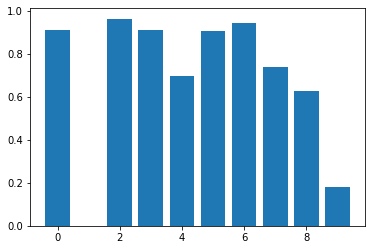

In [13]:
bynum = df_subset.groupby('label').agg({'compare':'mean'})
plt.bar(bynum.reset_index().label,bynum.reset_index().compare)

In [10]:
df_subset.describe()

,label,predict,compare
count,498.000000,498.000000,498.000000
mean,4.865462,4.489960,0.765060
std,2.775281,2.646303,0.424387
min,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000
50%,5.000000,5.000000,1.000000
75%,7.000000,7.000000,1.000000
max,9.000000,9.000000,1.000000


In [19]:
def score_prediction(a1,b1):
    a=a1.copy()
    b=b1.copy()
    mishape=False
    if len(a)!=len(b):
        mishape=True
    over = len(a)
    score = 0

    for i in range(len(a)):
#         print(a,b)
        if a[i]==b[i]:
            score+=1
            continue
        elif mishape:
            b.remove(b[i])
            if len(a)==len(b):
                mishape=False
            if a[i]==b[i]:
                score+=1
            else:
                pass

#     print(score,' of ',over)
#     print(a)
#     print(b)
    return score/over

In [20]:
df_subset['score'] = [score_prediction(a,b) for a,b in list(zip(df_subset['label'],df_subset['predict']))]

In [21]:
actual2 = []
predict2 = []

for i in range(len(df_subset)):
    actual2.append(np.array(df_subset)[i][1])
    predict2.append(list(df_subset.iloc[i]['predict'])    )


In [22]:
results = []
for i in range(len(df_subset)):
    results.append((np.array(actual2)[i]==np.array(predict2)[i])*1)
np.sum(np.sum(results))/(len(df_subset)*4)

/home/nina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


0.9681818181818181

In [23]:
count_correct = []
for arr in results:
    count_correct.append(np.sum(arr))


In [24]:
all_correct = count_correct.count(4)
correct_3 = count_correct.count(3)
correct_2 = count_correct.count(2)
correct_1 = count_correct.count(1)
none_correct = count_correct.count(0)

In [26]:
print(all_correct,correct_3,correct_2,correct_1,none_correct)

958 69 4 0 14


In [27]:
N=len(results)/100

In [28]:
print(all_correct/N,correct_3/N,correct_2/N,correct_1/N,none_correct/N)

91.67464114832536 6.6028708133971294 0.3827751196172249 0.0 1.3397129186602872


In [30]:
df_subset.describe()

,score
count,1045.000000
mean,0.980861
std,0.070011
min,0.500000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [31]:
df_subset.to_csv(MODEL_NAME+'___pregen.csv',index=None)

In [41]:
list(df_subset[df_subset.compare]['filename'])

['testmarker/10897649.jpg',
 'testmarker/17662814.jpg',
 'testmarker/26635409.jpg',
 'testmarker/39385210.jpg',
 'testmarker/46320745.jpg',
 'testmarker/50473.jpg',
 'testmarker/74036776.jpg',
 'testmarker/7493.jpg',
 'testmarker/81064327.jpg',
 'testmarker/84843617.jpg']

In [42]:
# a = labels[-1]
# b = predictions[-1]

In [43]:
arr = io.imread('testmarker/97765113.jpg')
arr.shape

(333, 1896, 3)

0.45795795795795796 0.05748945147679325 0.6576576576576577 0.06118143459915612
0.5330330330330331 0.18459915611814345 0.6396396396396397 0.06645569620253164
0.5765765765765766 0.3391350210970464 0.7267267267267268 0.0949367088607595
0.5795795795795796 0.47943037974683544 0.6846846846846847 0.10654008438818566
0.6201201201201201 0.5973101265822784 0.6456456456456456 0.06487341772151899
0.6066066066066066 0.6859177215189873 0.5885885885885885 0.018459915611814346
0.6486486486486487 0.7940400843881856 0.6246246246246246 0.016350210970464137
0.6606606606606606 0.9314345991561181 0.5585585585585585 0.07911392405063292


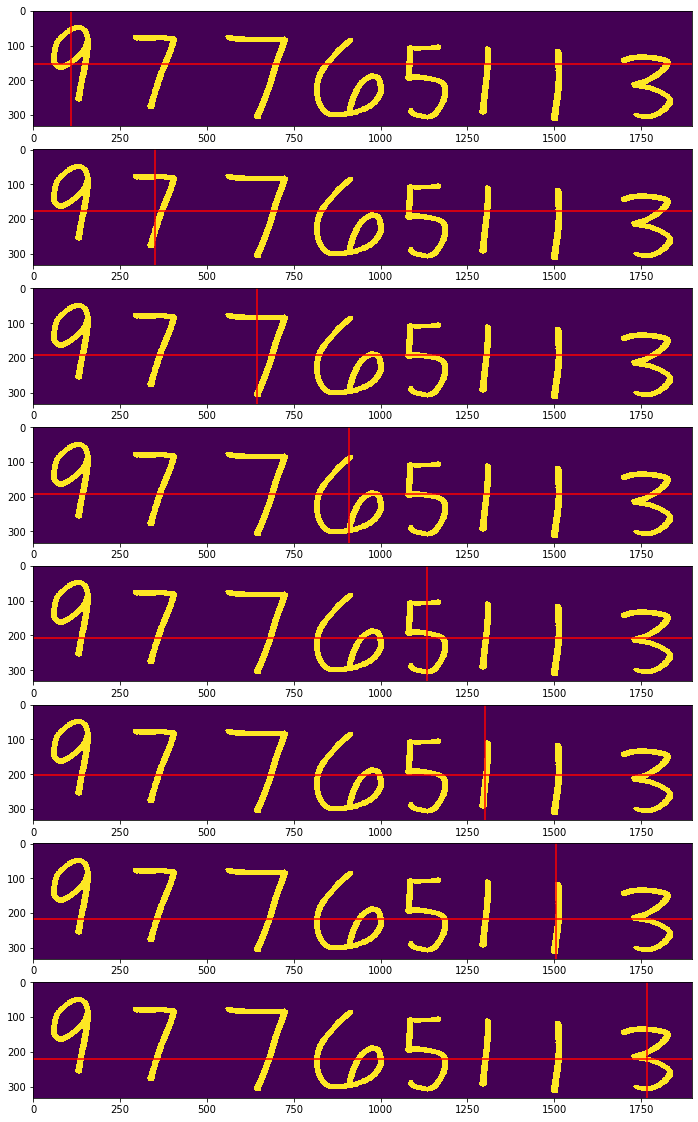

In [34]:
n=len(segments)
fig,axes = plt.subplots(n,figsize=(6*n,20))
for i,seg in enumerate(segments):
    x_center, y_center, xlen, ylen = newproc.crop_image(seg, label_arr, binary_arr,ax=axes[i])
    print(x_center, y_center, xlen, ylen)
    # plt.imshow(arr)
    # plt.axhline(x_center*x_height,color='r')
    # plt.axvline(y_center*y_height,color='r');

In [46]:
df_subset[df_subset.compare]

,filename,label,predict,compare,compare_sets,score
2,testmarker/10897649.jpg,"[1, 0, 8, 9, 7, 6, 4, 9]","[1, 0, 8, 9, 7, 6, 4, 9]",True,True,1.0
4,testmarker/17662814.jpg,"[1, 7, 6, 6, 2, 8, 1, 4]","[1, 7, 6, 6, 2, 8, 1, 4]",True,True,1.0
9,testmarker/26635409.jpg,"[2, 6, 6, 3, 5, 4, 0, 9]","[2, 6, 6, 3, 5, 4, 0, 9]",True,True,1.0
12,testmarker/39385210.jpg,"[3, 9, 3, 8, 5, 2, 1, 0]","[3, 9, 3, 8, 5, 2, 1, 0]",True,True,1.0
13,testmarker/46320745.jpg,"[4, 6, 3, 2, 0, 7, 4, 5]","[4, 6, 3, 2, 0, 7, 4, 5]",True,True,1.0
14,testmarker/50473.jpg,"[5, 0, 4, 7, 3]","[5, 0, 4, 7, 3]",True,True,1.0
19,testmarker/74036776.jpg,"[7, 4, 0, 3, 6, 7, 7, 6]","[7, 4, 0, 3, 6, 7, 7, 6]",True,True,1.0
21,testmarker/7493.jpg,"[7, 4, 9, 3]","[7, 4, 9, 3]",True,True,1.0
22,testmarker/81064327.jpg,"[8, 1, 0, 6, 4, 3, 2, 7]","[8, 1, 0, 6, 4, 3, 2, 7]",True,True,1.0
23,testmarker/84843617.jpg,"[8, 4, 8, 4, 3, 6, 1, 7]","[8, 4, 8, 4, 3, 6, 1, 7]",True,True,1.0


1 of 25
processing  testmarker/10645.jpg


TypeError: 'NoneType' object is not iterable

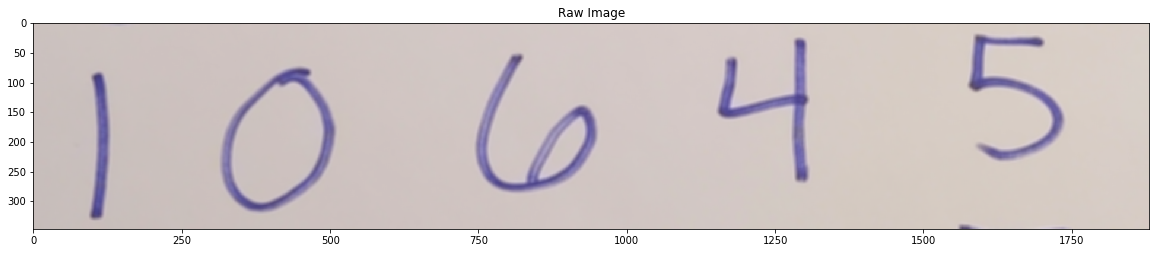

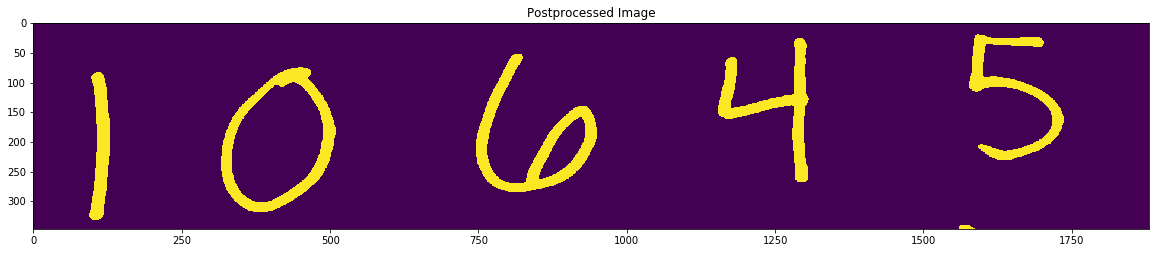

In [47]:
predictions = []
with open('test_new_model__subset.txt','w') as writeFile:
    for index,image in enumerate(df_subset['filename'].iloc[1:]):
        matname = 'tf22/HANDWRITING__'+image[-8:-4]
        print(index+1,'of',len(df_subset))
        print('processing ',image)
        binary_arr,label_arr, segments,orig = proc.label_segments(image,matname,photo=True)
        predicted = []
        for seg in segments:
            try:
                pred = proc.crop_image(seg,label_arr,orig,model=tf_model,direc=matname,svc=False,tf=True)[1]
            except:
                pred = None
            if pred!= None: predicted.append(pred)
        predictions.append(predicted)
        row = str(df_subset.iloc[index]['label'])+'; '+str(list(pred))+'\n'
        print(row)
        writeFile.write(row)
writeFile.close()


In [305]:
# df_subset.to_csv('test_pred_tf3.csv',index=False)
predictions

[[], [], [], [], [], [], [], []]

Text(0.5, 1.0, 'Preprocessed Binary Image')

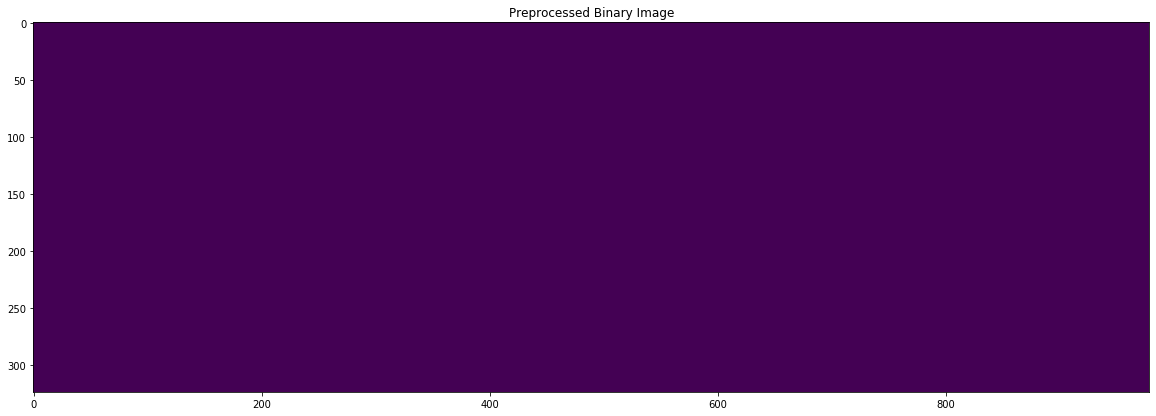

In [44]:
image = io.imread(imgs[0])
alpha=1.2
beta=0
marker = False
image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
if marker==False:
    image = cv2.blur(image, (8, 8))
arrraaayyy = np.array(image)
fig,axes = plt.subplots(1,figsize=(20,10))
label_arr, num_seg = ndi.label(color.rgb2gray(arrraaayyy))
axes.imshow(label_arr)
axes.set_title('Preprocessed Binary Image') 


In [31]:
def plot_numbered_image(label_arr,savename='',no_rotate=False):
    IMAGE = savename+'_segmented.jpg'
    pixarray=np.rot90(label_arr,3)
    imax,jmax = pixarray.shape
    fig,ax=plt.subplots(ncols=1, nrows=1, figsize=(20,int(20*jmax/imax)))
    plt.xticks(np.arange(0,imax))
    plt.yticks(np.arange(0,jmax))
    for i in range(0,imax,2):
        for j in range(0,jmax,2):
            val = pixarray[i][j]
            if val != 0:
                ax.scatter(i,j,s=300,color='k')
#                 ax.text(i,j,8,fontsize=20)
#     ax.patch.set_facecolor('black')
    ax.set_axis_off()
    plt.xticks([])
    plt.yticks([])            
    plt.show()
    fig.savefig(IMAGE)
    
#     ORIG = cv2.imread(IMAGE)    
#     kernel = np.ones((10,10),np.float32)/25
#     GAUSS = cv2.blur(ORIG, (25, 25))    
# #     GAUSS = cv2.filter2D(ORIG,-1,kernel)
# #     GAUSS=cv2.medianblur(IMAGE,(5,5))
#     io.imsave(IMAGE,GAUSS)    
    
#     BLACK = plt.imread(IMAGE)
#     INVERT = cv2.bitwise_not(BLACK)
#     io.imsave(savename+'_segmented.jpg',INVERT)
#     return INVERT

my_app/data/predictions__img_original_from_photo.png
[1, 4, 1, 1, 5, 5, 2, 7, 7, 4, 1, 4, 2, 1, 8, 1]


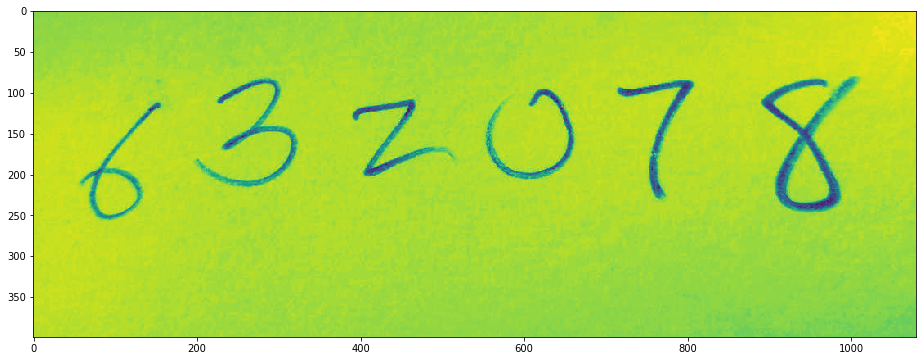

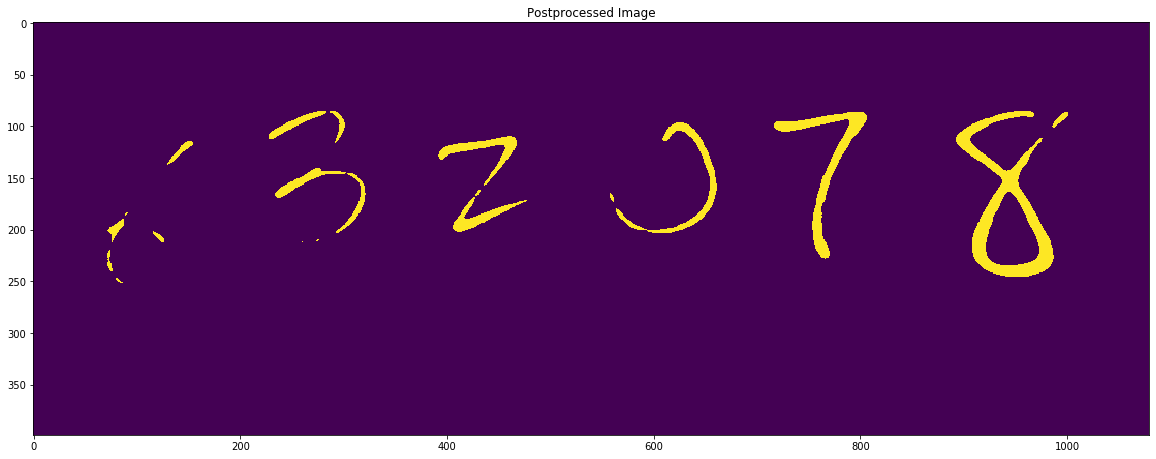

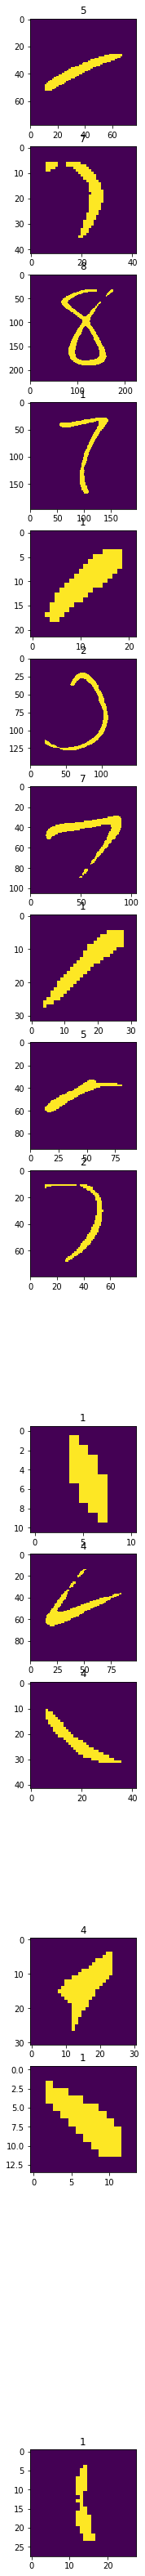

In [23]:
from math import ceil 
import cv2
from PIL import Image
IMAGE = 'my_app/data/predictions__img_original_from_photo.png'          ###imgs[0]
plt.imshow(io.imread(IMAGE))
binary_arr,label_arr, segments,orig = proc.label_segments(IMAGE,'',photo=True)
plt.imshow(np.array(binary_arr, dtype = np.uint8 ))

predictions = []
fig,axes = plt.subplots(len(segments),figsize=(10,60))
for seg,ax in list(zip(segments,axes.flatten())):
    found = label_arr==seg
    x,y = np.where(found)
    xmin,xmax,ymin,ymax = np.min(x),np.max(x),np.min(y),np.max(y)
    xlen,ylen = found[xmin:xmax,ymin:ymax].shape
    diff = np.abs(ylen-xlen)
    change = ceil(diff/2)
    if diff!=0:
        if ylen>xlen:
            xmin-=change
            xmax+=change

        else:
            ymin-=change
            ymax+=change

        xlen,ylen = xmax-xmin,ymax-ymin
        diff=np.abs(ylen-xlen)
        if xlen>ylen: ymax+=diff
        elif ylen>xlen: xmax+=diff
    digit = binary_arr[xmin:xmax,ymin:ymax]
    digit = np.pad(digit,int(len(digit)*.2),mode= 'constant', constant_values=(0,0))        
    

    if digit.shape[0]<10:
        ax.set_visible(False)       
        pass
    else:
        ax.imshow(digit)
        im = Image.fromarray(np.array(digit)*255.0).convert("RGB")
        im.save('000.png')
        img = cv2.resize(cv2.imread('000.png',cv2.IMREAD_GRAYSCALE),(28,28),interpolation=cv2.INTER_CUBIC)
        p = np.argmax(tf_model.predict(img.astype(float).flatten().reshape((1, 28, 28, 1))))
        ax.set_title(p)
        predictions.append([ymin,p])

predictions.sort()    
predictions = [pr[1] for pr in predictions]
print(IMAGE)
print(predictions)

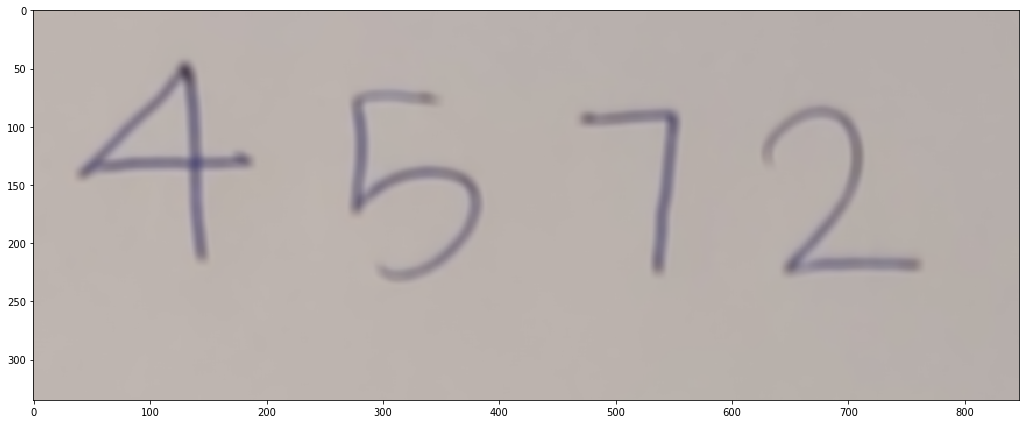

In [214]:
ORIG = io.imread(IMAGE)
GAUSS = cv2.blur(ORIG, (10, 10)) 
io.imshow(GAUSS)

In [98]:
results

array([1, 1, 1, 1], dtype=object)

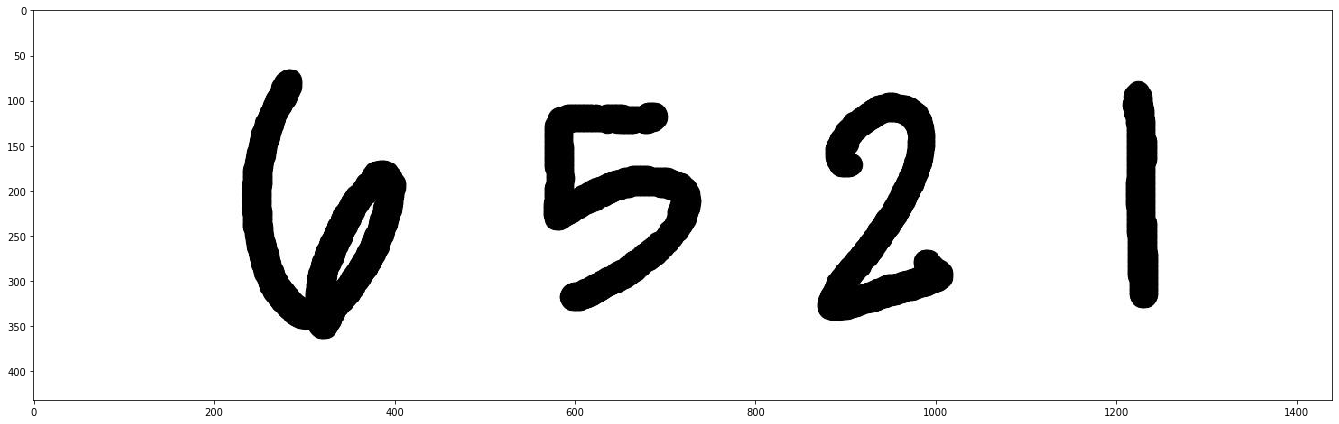

In [135]:
from skimage import io, filters, color
import cv2
BLACK = io.imread('_segmented.jpg')
INVERT = cv2.bitwise_not(BLACK)
io.imshow(INVERT)

In [ ]:
for img in 

In [21]:
import tensorflow as tf